<a href="https://colab.research.google.com/github/sujira7236212/Chocolate_Analysis/blob/main/chocolate_bar_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rtatman_chocolate_bar_ratings_path = kagglehub.dataset_download('rtatman/chocolate-bar-ratings')

print('Data source import complete.')


Using Colab cache for faster access to the 'chocolate-bar-ratings' dataset.
Data source import complete.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chocolate-bar-ratings/flavors_of_cacao.csv
/kaggle/input/chocolate-bar-ratings/.nfs00000000611bfbc500000415


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('/kaggle/input/chocolate-bar-ratings/flavors_of_cacao.csv')

In [7]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [9]:
df.describe()

,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


# Rename Column

In [10]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [11]:
columns = list(df.columns)
re_columns = []
for n in columns:
    re_columns.append(n.replace('\n','_').replace(' ','_'))
re_columns

['Company\xa0_(Maker-if_known)',
 'Specific_Bean_Origin_or_Bar_Name',
 'REF',
 'Review_Date',
 'Cocoa_Percent',
 'Company_Location',
 'Rating',
 'Bean_Type',
 'Broad_Bean_Origin']

In [12]:
re_columns[0] = "Company"
df = df.rename(columns=dict(zip(df.columns,re_columns)))
df.columns

Index(['Company', 'Specific_Bean_Origin_or_Bar_Name', 'REF', 'Review_Date',
       'Cocoa_Percent', 'Company_Location', 'Rating', 'Bean_Type',
       'Broad_Bean_Origin'],
      dtype='object')

# Drop null values

In [13]:
df.isnull().sum()

,0
Company,0
Specific_Bean_Origin_or_Bar_Name,0
REF,0
Review_Date,0
Cocoa_Percent,0
Company_Location,0
Rating,0
Bean_Type,1
Broad_Bean_Origin,1


In [14]:
df[df.isnull().any(axis=1)]

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
1072,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


In [15]:
df = df.dropna()
df.isnull().sum()

,0
Company,0
Specific_Bean_Origin_or_Bar_Name,0
REF,0
Review_Date,0
Cocoa_Percent,0
Company_Location,0
Rating,0
Bean_Type,0
Broad_Bean_Origin,0


In [16]:
df['Bean_Type'].value_counts().head()
list(df['Bean_Type'][0:10])

['\xa0',
 '\xa0',
 '\xa0',
 '\xa0',
 '\xa0',
 'Criollo',
 '\xa0',
 'Criollo',
 'Criollo',
 '\xa0']

# Replace Bean_Type to None

In [17]:
def rep_space(x):
    if(x in '\xa0'):
        return 'None'

df['Bean_Type'] = df['Bean_Type'].apply(rep_space)
df.head()

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,None,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,None,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,None,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,None,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,None,Peru


# Convert Cocoa_Percent to numerical values

In [18]:
df['Cocoa_Percent'] = df['Cocoa_Percent'].str.replace('%','').astype(float)/100
df.head()

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,None,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,None,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,None,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,None,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,None,Peru


**Question to answer**

1. which company get the highest rating?
2. what coaco percantage make the best chocolate?
3. Does cocoa percentage correlate with rating?
4. Trend of chocolate ratings over time?

# what coaco percantage make the best chocolate?

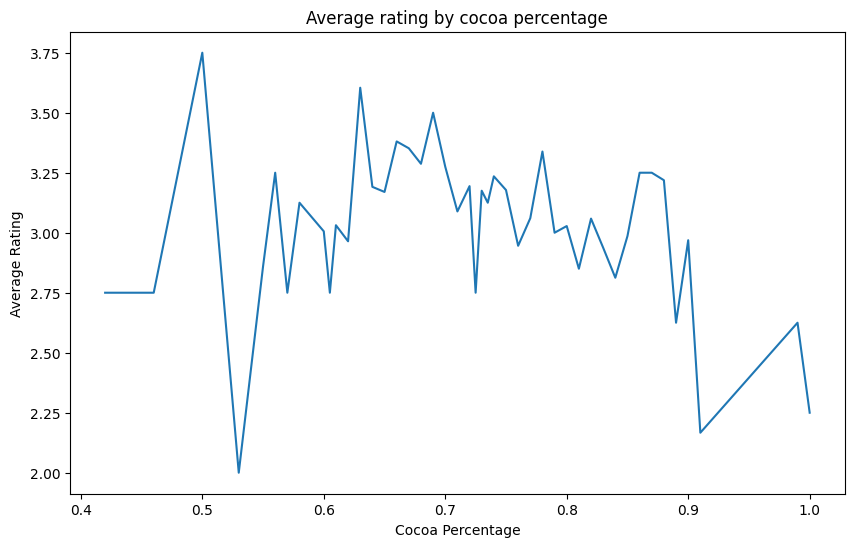

In [19]:
#Average rating per cocoa percentage
cocoa_rating = df.groupby('Cocoa_Percent')['Rating'].mean()

plt.figure(figsize=(10,6))
plt.plot(cocoa_rating.index,cocoa_rating.values)
plt.xlabel("Cocoa Percentage")
plt.ylabel("Average Rating")
plt.title("Average rating by cocoa percentage")
plt.show()

# Does cocoa percentage correlate with rating?

correlation between Cocoa Percentage and Rating :  -0.16475831754562736


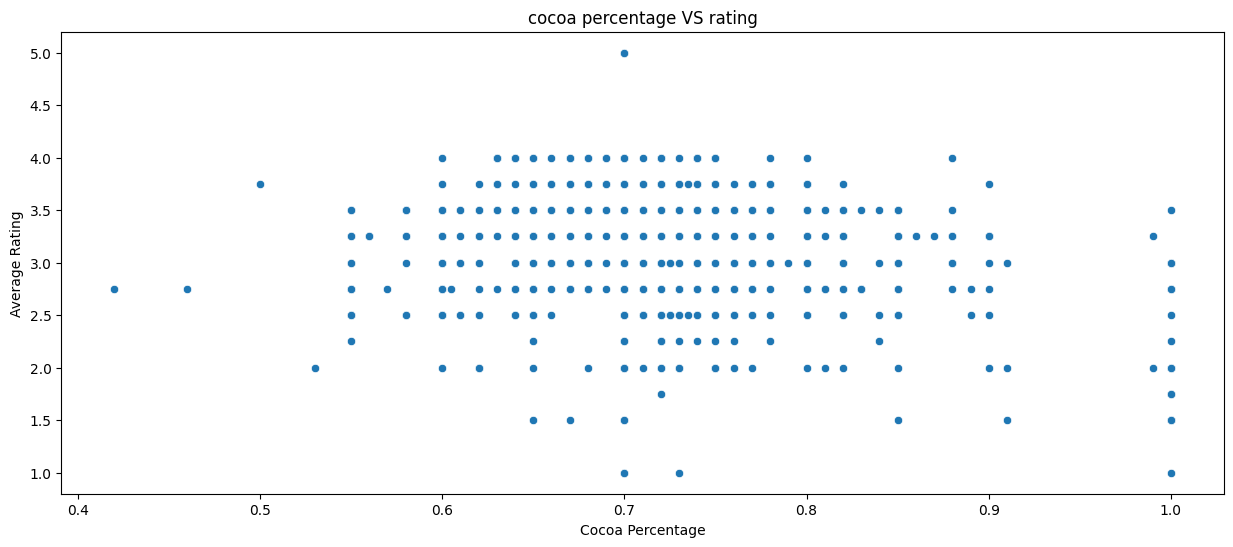

In [20]:
# Correlation
corr = df['Cocoa_Percent'].corr(df['Rating'])
print("correlation between Cocoa Percentage and Rating : ",corr)

#Visualize
plt.figure(figsize=(15,6))
sns.scatterplot(x = 'Cocoa_Percent', y = 'Rating', data = df)
plt.xlabel("Cocoa Percentage")
plt.ylabel("Average Rating")
plt.title("cocoa percentage VS rating")
plt.show()

- This show that rating does not depends on cocoa percentage

# Trend of chocolate ratings over time?

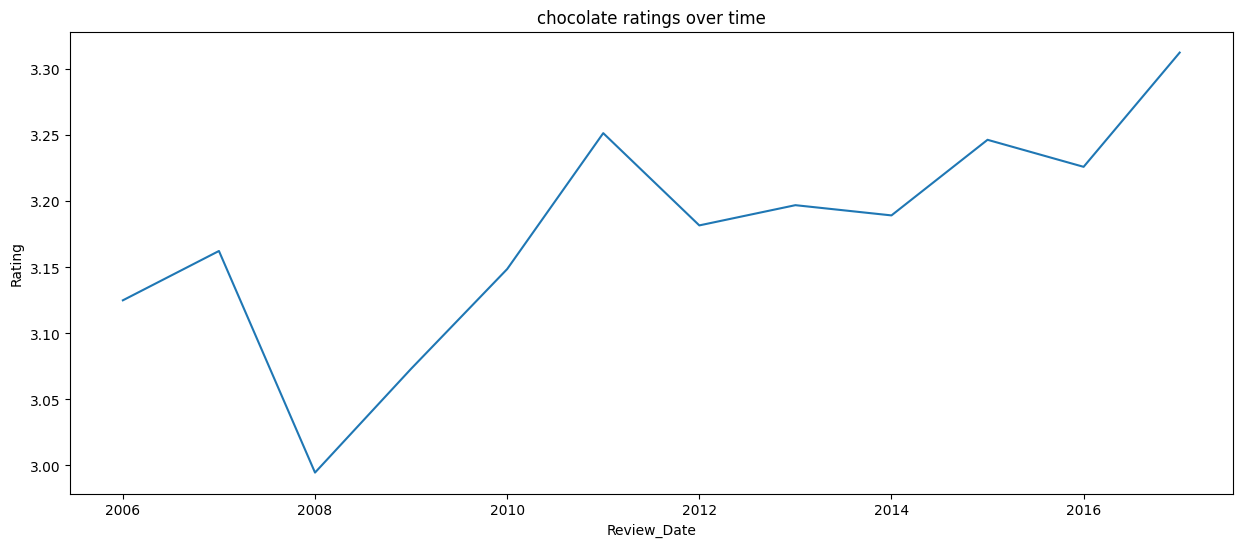

In [21]:
df['Year'] = pd.to_numeric(df['Review_Date'], errors='coerce')

year_rating = df.groupby('Review_Date')['Rating'].mean()

plt.figure(figsize=(15,6))
plt.plot(year_rating.index,year_rating.values)
plt.xlabel("Review_Date")
plt.ylabel("Rating")
plt.title("chocolate ratings over time")
plt.show()

# Trend of Cocoa percentage over time

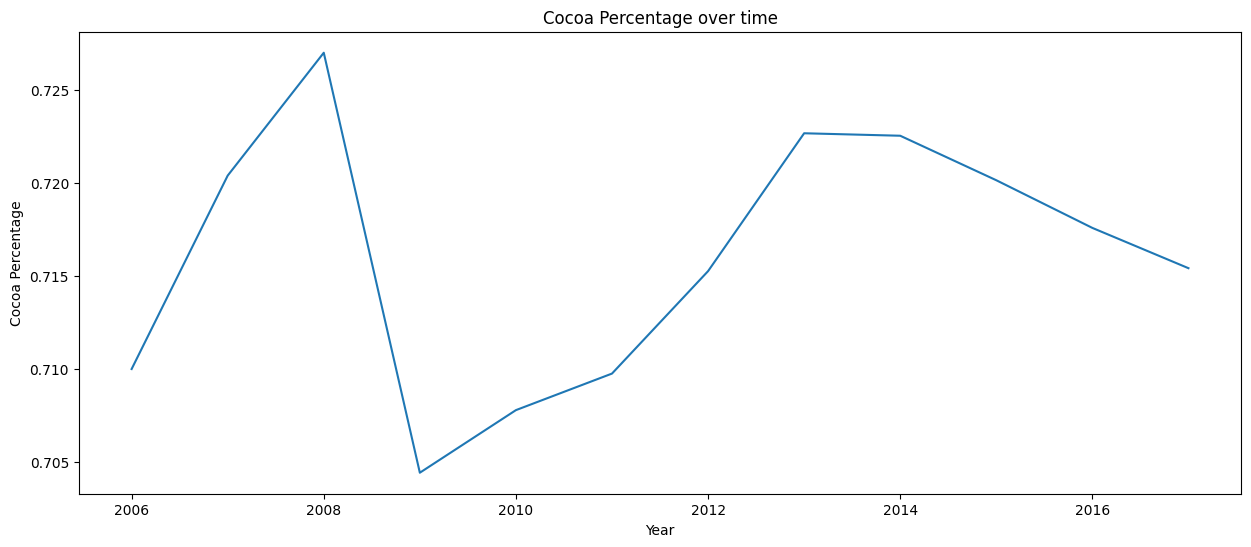

In [22]:
df['Year'] = pd.to_numeric(df['Review_Date'], errors='coerce')

year_rating = df.groupby('Year')['Cocoa_Percent'].mean()

plt.figure(figsize=(15,6))
plt.plot(year_rating.index,year_rating.values)
plt.xlabel("Year")
plt.ylabel("Cocoa Percentage")
plt.title("Cocoa Percentage over time")
plt.show()

- In 2008, the average chocolate rating was lower than in other years, despite having the highest average cocoa percentage.
- In 2009, the average cocoa percentage dropped to its lowest point across the dataset, while the average rating increased compared to 2008.
- Overall, the trend in ratings appears to increase slightly for chocolates with cocoa percentages in the range of 70.5% to 72.2%.

# Which company gets the highest rating?

Company
Tobago Estate (Pralus)                  4.000000
Ocelot                                  3.875000
Heirloom Cacao Preservation (Zokoko)    3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Un Dimanche A Paris                     3.750000
Chocola'te                              3.750000
Obolo                                   3.750000
Name: Rating, dtype: float64


/tmp/ipython-input-407412958.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_company.values, y = top_company.index, palette="viridis")


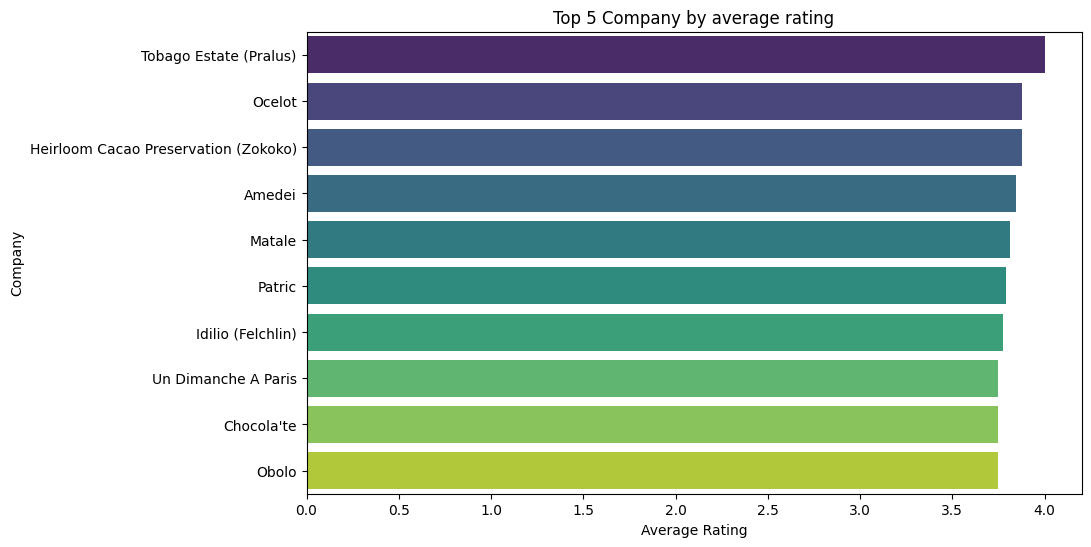

In [27]:
#Average rating per company
company_rating = df.groupby('Company')['Rating'].mean().sort_values(ascending = False)

#Top 10 highest rating
top_company = company_rating.head(10)
print(top_company)

# top5_companies = company_rating.head(5).index.tolist()
top10_companies = company_rating.head(10).index.tolist()

#Visualize
plt.figure(figsize=(10,6))
sns.barplot(x = top_company.values, y = top_company.index, palette="viridis")
plt.xlabel("Average Rating")
plt.title("Top 5 Company by average rating")
plt.show()

# Do the top companies have typical cocoa percentage ranges?

/tmp/ipython-input-1572367794.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = company_cocoa.values, y = company_cocoa.index, palette="viridis")


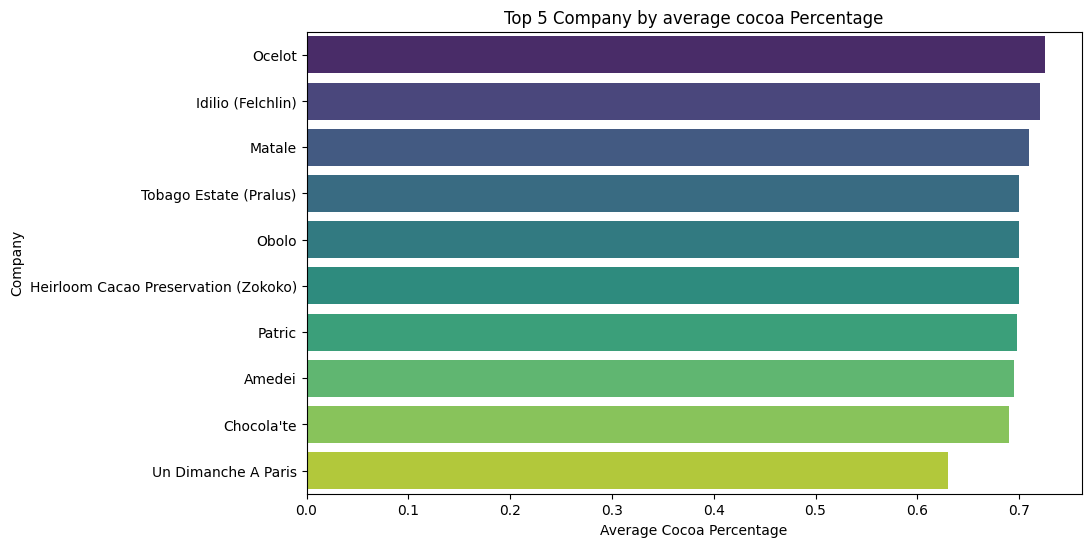

In [28]:
top_df = df[df['Company'].isin(top10_companies)]

#Average rating per company
company_cocoa = top_df.groupby('Company')['Cocoa_Percent'].mean().sort_values(ascending = False)

#Visualize
plt.figure(figsize=(10,6))
sns.barplot(x = company_cocoa.values, y = company_cocoa.index, palette="viridis")
plt.xlabel("Average Cocoa Percentage")
plt.title("Top 5 Company by average cocoa Percentage")
plt.show()


- Among the top-rated companies, many chocolates fall within the X–Y% cocoa range, suggesting this percentage is popular among higher-rated chocolates.